In [2]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from Python_Scripts import generate_plots as plots
from Python_Scripts import order_analyses as analyses

ITEMS = ['I09', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I17', 'I18', 'I19', 'I20', 'I21', 'I22', 'I23']

LEFT = ITEMS[:9]
CENTRE = ITEMS[3:12]
RIGHT = ITEMS[6:]

LOCS = [('L', LEFT),
        ('C', CENTRE), 
        ('R', RIGHT)]
ORDERS = [('f', 0, [1, 2, 3, 4, 5, 6, 7, 8]),
          ('m', 4, [0, 1, 2, 3, 5, 6, 7, 8]),
          ('b', 8, [0, 1, 2, 3, 4, 5, 6, 7])]

prolific_tech = 1
rep_tech = 0


In [3]:
allParticipants = pd.read_csv('Results/participant_data.csv')
allTrials = pd.read_csv('Results/trial_data.csv')

## Demographics

In [4]:
N = allParticipants.shape[0] + prolific_tech + rep_tech
N_prolific = allParticipants[allParticipants['POOL'] == 'prolific'].shape[0] + prolific_tech 
N_rep = allParticipants[allParticipants['POOL'] == 'rep'].shape[0] + rep_tech

badComprehension = allParticipants[allParticipants['ATTEMPTS'] > 2]['P_ID'].to_list()
tooManyErrors = allParticipants[allParticipants['TOTAL_ERRORS'] > 3]['P_ID'].to_list()
both = len(set(badComprehension) & set(tooManyErrors))

sampleDF = allParticipants[(allParticipants['ATTEMPTS'] < 3) & (allParticipants['TOTAL_ERRORS'] < 4)]
participants = sampleDF['P_ID'].tolist()
trialDF = allTrials[allTrials['P_ID'].isin(participants)]

print(f'We collected data from {N} participants on Prolific (N = {N_prolific}) and REP (N = {N_rep}).')
print(f'{prolific_tech+rep_tech} participant was excluded due to technical issues.')
print(f'{len(badComprehension)} participants were excluded for failing to answer 6 comprehension questions correctly after 3 attempts at answering them.')
print(f'{len(tooManyErrors)} participants were excluded for making more than 3 categorization errors.')

We collected data from 239 participants on Prolific (N = 159) and REP (N = 80).
1 participant was excluded due to technical issues.
7 participants were excluded for failing to answer 6 comprehension questions correctly after 3 attempts at answering them.
10 participants were excluded for making more than 3 categorization errors.


In [5]:
print(f'We included N = {sampleDF.shape[0]} participants, {sampleDF['GENDER'].value_counts()['woman']} were women and {sampleDF['GENDER'].value_counts()['man']} were men.')
print(f'Ages ranged from {sampleDF['AGE'].min()} to {sampleDF['AGE'].max()} (median: {sampleDF['AGE'].median():.0f} years).')

We included N = 221 participants, 140 were women and 80 were men.
Ages ranged from 18 to 75 (median: 31 years).


In [6]:
cleanedTrial = analyses.get_level2_cat_stats(trialDF, ITEMS)
cleanedTrial.to_csv('Results/level2_trial_data.csv', index=None)

## Prolific Results

In [7]:
prolific_trials = allTrials[allTrials['POOL'] == 'prolific']
prolific_participants = allParticipants[allParticipants['POOL'] == 'prolific']

N = prolific_participants.shape[0] + prolific_tech

badComprehension = prolific_participants[prolific_participants['ATTEMPTS'] > 2]['P_ID'].to_list()
tooManyErrors = prolific_participants[prolific_participants['TOTAL_ERRORS'] > 3]['P_ID'].to_list()

prolific_sample = prolific_participants[(prolific_participants['ATTEMPTS'] < 3) & (prolific_participants['TOTAL_ERRORS'] < 4)]
participants = prolific_sample['P_ID'].tolist()
prolific_trials = prolific_trials[prolific_trials['P_ID'].isin(participants)]

print(f'We collected data from {N} participants on Prolific')
print(f'{prolific_tech} participant was excluded due to technical issues.')
print(f'{len(badComprehension)} participants were excluded for failing to answer 6 comprehension questions correctly after 3 attempts at answering them.')
print(f'{len(tooManyErrors)} participants were excluded for making more than 3 categorization errors.')

print(f'We included N = {prolific_sample.shape[0]} participants, {prolific_sample['GENDER'].value_counts()['woman']} were women and {prolific_sample['GENDER'].value_counts()['man']} were men.')
print(f'Ages ranged from {prolific_sample['AGE'].min()} to {prolific_sample['AGE'].max()} (median: {prolific_sample['AGE'].median():.0f} years).')

We collected data from 159 participants on Prolific
1 participant was excluded due to technical issues.
4 participants were excluded for failing to answer 6 comprehension questions correctly after 3 attempts at answering them.
8 participants were excluded for making more than 3 categorization errors.
We included N = 146 participants, 86 were women and 60 were men.
Ages ranged from 19 to 75 (median: 37 years).


In [8]:
cleaned_prolific = analyses.get_level2_cat_stats(prolific_trials, ITEMS)

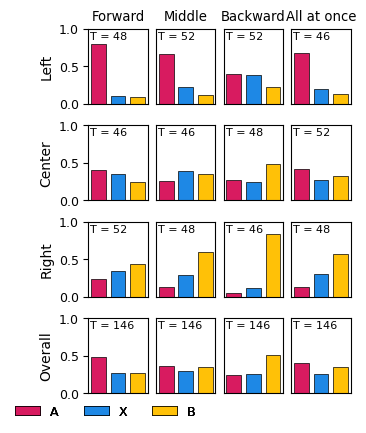

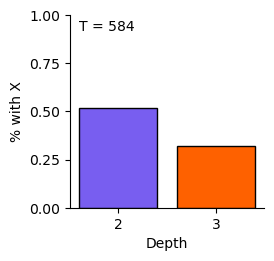

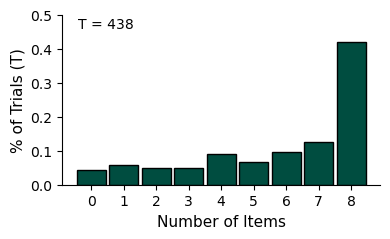

In [9]:
plots.order_effects_plot(cleaned_prolific, fname='Figures/prolific_AXB_by_order_loc', legend=True, figsize=(3.2, 4))
plots.new_category_plot(cleaned_prolific, fname='Figures/prolific_X_by_depth', figsize=(2.5, 2.5))
seq_df, long_df = analyses.get_seq_data(cleaned_prolific, LOCS, ORDERS)
plots.same_as_dist(seq_df, fname='Figures/prolific_dist')

In [10]:
rep_trials = allTrials[allTrials['POOL'] == 'rep']
rep_participants = allParticipants[allParticipants['POOL'] == 'rep']

N = rep_participants.shape[0]

badComprehension = rep_participants[rep_participants['ATTEMPTS'] > 2]['P_ID'].to_list()
tooManyErrors = rep_participants[rep_participants['TOTAL_ERRORS'] > 3]['P_ID'].to_list()

rep_sample = rep_participants[(rep_participants['ATTEMPTS'] < 3) & (rep_participants['TOTAL_ERRORS'] < 4)]
participants = rep_sample['P_ID'].tolist()
rep_trials = rep_trials[rep_trials['P_ID'].isin(participants)]

print(f'We collected data from {N} participants on REP')
print(f'{len(badComprehension)} participants were excluded for failing to answer 6 comprehension questions correctly after 3 attempts at answering them.')
print(f'{len(tooManyErrors)} participants were excluded for making more than 3 categorization errors.')

print(rep_sample['GENDER'].value_counts(dropna=False))
print(f'We included N = {rep_sample.shape[0]} participants, {rep_sample['GENDER'].value_counts()['woman']} were women and {rep_sample['GENDER'].value_counts()['man']} were men.')
print(f'Ages ranged from {rep_sample['AGE'].min()} to {rep_sample['AGE'].max()} (median: {rep_sample['AGE'].median():.0f} years).')

We collected data from 80 participants on REP
3 participants were excluded for failing to answer 6 comprehension questions correctly after 3 attempts at answering them.
2 participants were excluded for making more than 3 categorization errors.
GENDER
woman    54
man      20
NaN       1
Name: count, dtype: int64
We included N = 75 participants, 54 were women and 20 were men.
Ages ranged from 18 to 44 (median: 19 years).


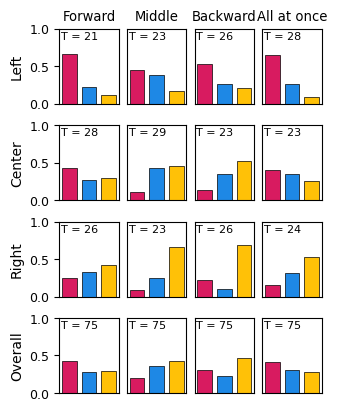

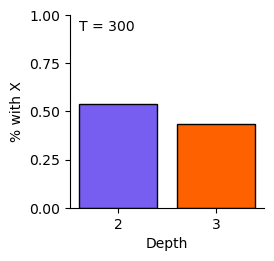

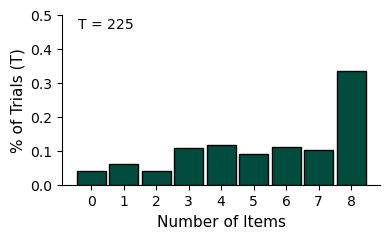

In [11]:
cleaned_rep = analyses.get_level2_cat_stats(rep_trials, ITEMS)
plots.order_effects_plot(cleaned_rep, fname='Figures/rep_AXB_by_order_loc')
plots.new_category_plot(cleaned_rep, fname='Figures/rep_X_by_depth', figsize=(2.5, 2.5))


seq_df, long_df = analyses.get_seq_data(cleaned_rep, LOCS, ORDERS)
plots.same_as_dist(seq_df, fname='Figures/rep_dist')


## Main Results
For now we focus on the second level category assignment of items, regardless if participants added items to a hierarchy with 2 or 3 levels of categorization

#### 1. The sequence of item presentation leads to different category assignments.
Specifically, the mean proportion of items assigned to categories A, B, and X differs with each item presentation order.  We look at this individually for each location as well as overall. 

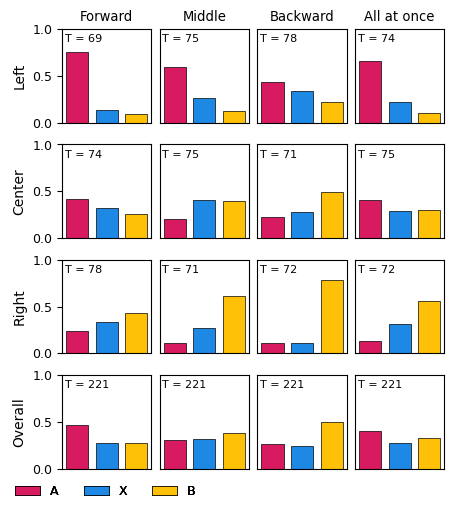

In [12]:
plots.order_effects_plot(cleanedTrial, figsize=(4.4, 4.75), legend=True)

#### 2. When presented in sequence, items are more likely than not to be assigned to the same category as the first item categorized.
This is partially because all new items shown are meant to be similar to one another. We compute the median, mean, and mode proportion of items assigned to the same category as the first in a sequence.

39.06
Mean: 0.710
Median items: 0.875
Mode: 1.0


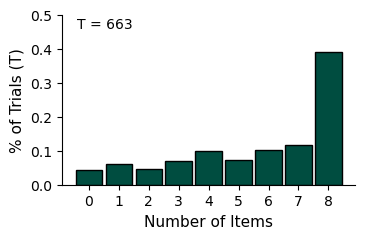

In [13]:
seq_df, long_df = analyses.get_seq_data(cleanedTrial, LOCS, ORDERS)
seq_df.to_csv('Results/hyp2_df.csv', index=None)
long_df.to_csv('Results/hyp2_df_long.csv', index=None)

mean_prob = seq_df['PROP_SAME'].mean()
median_prob = seq_df['PROP_SAME'].median()
mode_probs = seq_df['PROP_SAME'].mode().values
all_same = seq_df[seq_df['PROP_SAME'] == 1].count()['PROP_SAME'] / seq_df.shape[0]
print(f'{round(all_same*100, 2):.2f}')

print(f'Mean: {mean_prob:.3f}')
print(f'Median items: {median_prob}')
print(f'Mode: {','.join([f'{m}' for m in mode_probs])}')

plots.same_as_dist(seq_df, figsize=(3.75, 2.5))

#### 3. Participants are more likely to make an entirely new category at the second level (X) in the 2 level condition than in the 3 level condition
We don't expect the relative proportion of items assigned to A versus B to change.

   DEPTH   HAS_X
0      2  0.5271
1      3  0.3597


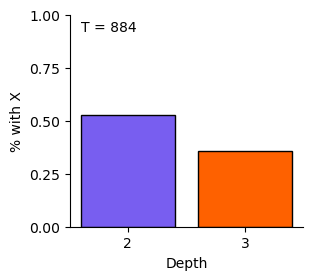

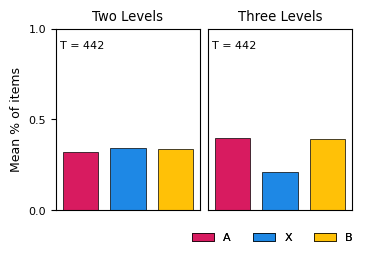

In [14]:
plots.new_category_plot(cleanedTrial, figsize=(3, 2.75))
print(round(cleanedTrial[['DEPTH', 'HAS_X']].groupby(['DEPTH']).mean().reset_index(), 4))

plots.generate_summary_AXB_plot(cleanedTrial, 'DEPTH', [2, 3], ['Two Levels', 'Three Levels'], figsize=(3.5, 2.15), fname='Figures/AXB_by_depth')

#### 4. When item presentation order conflicts with item location, category assignments will diverge more from the all-at-once condition than other orders
This holds for the left-shifted condition, but not the right-shifted condition.

In [15]:
left_f, left_m, left_b =  analyses.get_jsds(cleanedTrial, 'L')
right_f, right_m, right_b =  analyses.get_jsds(cleanedTrial, 'R')

table = pd.DataFrame({'': ['Left', 'Right'],
        'Forward': [left_f, right_f],
        'Middle': [left_m, right_m],
        'Backward': [left_b, right_b]})

print(table.to_string(index=False))

latex = table.to_latex(index=False, float_format="{:.3f}".format)
with open('Tables/JSD_table.tex', 'w') as f:
    f.write(latex)


       Forward   Middle  Backward
 Left 0.080148 0.050357  0.162922
Right 0.104118 0.044494  0.189199


In [16]:
# pbf, pbm = analyses.perm_test(cleanedTrial, 'L', 1000)
# print(f'{pbf:.3f}, {pbm:.3f}')

In [17]:
# pfb, pfm = analyses.perm_test(cleanedTrial, 'R', 1000)
# print(f'{pfb:.3f}, {pfm:.3f}')

## Additional Results

Category assignment by location

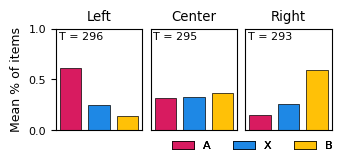

In [18]:
plots.generate_summary_AXB_plot(cleanedTrial, 'LOC', ['L', 'C', 'R'], ['Left', 'Center', 'Right'],  fname='Figures/AXB_by_loc', figsize=(3.3, 1.35))

Category assignment by stimuli set

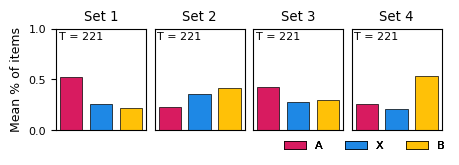

In [19]:
plots.generate_summary_AXB_plot(cleanedTrial, 'STIMULI', [1, 2, 3, 4], ['Set 1', 'Set 2', 'Set 3', 'Set 4'], fname='Figures/AXB_by_set', figsize=(4.4, 1.35))

Category assignment by participant pool

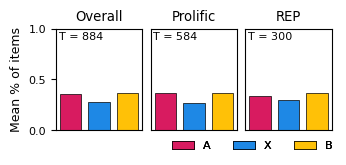

In [20]:
plots.generate_summary_AXB_plot(cleanedTrial, 'POOL', ['prolific', 'rep'], ['Prolific', 'REP'], figsize=(3.3, 1.35), fname='Figures/AXB_by_pool', overall=True)

In [32]:
print(cleanedTrial[['PROP_A', 'PROP_X', 'PROP_B']].mean(numeric_only=True).values)
print(cleanedTrial[['PROP_A', 'PROP_X', 'PROP_B']][cleanedTrial['POOL'] == 'prolific'].mean(numeric_only=True).values)
print(cleanedTrial[['PROP_A', 'PROP_X', 'PROP_B']][cleanedTrial['POOL'] == 'rep'].mean(numeric_only=True).values)



[0.35897436 0.27564103 0.36525892]
[0.36986301 0.26655251 0.36358447]
[0.33777778 0.29333333 0.36851852]
